In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
#import mahotas
import cv2
from numpy import array
import math

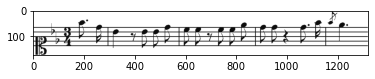

In [2]:
#converting colored image to gray
gray_image = cv2.imread('dset.jpg',0)
plt.imshow(gray_image, cmap = plt.get_cmap('gray'))
plt.show()

In [3]:
height, width = gray_image.shape

In [4]:
# generating binary image by adaptive threshold method
binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 99, 30)

In [5]:

for h in range(height):
    for w in range(width):
        if binary_image[h,w]>150:
            binary_image[h,w]=255
        else:
            binary_image[h,w]=0

In [6]:
# this function receive an image, a width varible on which it have to find the staff line from below and a height veriable
# the height veriable indicate at what height it should start to find a pair of lines
def findStaffPair(image, i, j = height - 1):
    staff_start = []
    space_start = []
    while image[j,i] == 255 and j >= 0:
        j = j - 1
        
    staff_start.append(j)
    while image[j,i] == 0 and j >= 0:
        j = j - 1
        
    space_start.append(j)
    while image[j,i] == 255 and j >= 0:
        j = j - 1
    
    staff_start.append(j)
    while image[j,i] == 0 and j >= 0:
        j = j - 1
    
    space_start.append(j)
    while image[j,i] == 255 and j >= 0:
        j = j - 1
    
    staff_start.append(j)
    while image[j,i] == 0 and j >= 0:
        j = j - 1
    
    space_start.append(j)
    while image[j,i] == 255 and j >= 0:
        j = j - 1
    
    staff_start.append(j)
    while image[j,i] == 0 and j >= 0:
        j = j - 1
    
    space_start.append(j)
    while image[j,i] == 255 and j >= 0:
        j = j - 1
    
    staff_start.append(j)
    while image[j,i] == 0 and j >= 0:
        j = j - 1
    
    space_start.append(j)
    while image[j,i] == 255 and j >= 0:
        j = j - 1
    staff_height = []
    for k in range(5):
        staff_height.append(staff_start[k]-space_start[k])
    
    space_height = []
    for k in range(4):
        space_height.append(space_start[k] - staff_start[k+1])
    staff_height_verified = False
    precision_percent = 5
    staff_height_precision = int(staff_height[0]*precision_percent/100)
    for k in range(5):
        if k != 0:
            if (staff_height[k] >= staff_height[0] - staff_height_precision) and (staff_height[k] <= staff_height[0] + staff_height_precision):
                staff_height_verified = True
            else:
                staff_height_verified = False
                break
    minimum_space_height = 10
    space_varified = False
    for k in range(4):
        if space_height[k] > minimum_space_height:
            space_verified = True
        else:
            space_verified = False
            break
    
    space_height_precision = int(space_height[0]*precision_percent/100)
    k = 0
    while k < 4 and space_verified == True:
        if k!=0:
            if (space_height[k] >= space_height[0] - space_height_precision) and (space_height[k] <= space_height[0] + space_height_precision):
                space_verified = True
            else:
                space_verified = False
                break
        k = k + 1
    
    if staff_height_verified == True and space_verified == True:
        return staff_start, space_start
    else:
        staff_start = []
        space_start = []
        return staff_start, space_start

In [7]:
#main purpose of this block of code is to find a point where a vertical line can pass through first five staff lines

i = 0
space_start = []
staff_start = []
found = False
start_point ={}
while i<width and found == False:
    staff_start, space_start = findStaffPair(binary_image, i)
    if len(staff_start) > 0  and len(space_start) > 0:
        found = True
        start_point["height"]=staff_start[0]
        start_point["width"] = i
    else:
        found = False
    i = i + 1
print("Start Point =", start_point)

Start Point = {'height': 136, 'width': 1}


In [8]:
#main purpose of this block of code is to find a point from right to left where
#a vertical line can pass through first five staff lines

i = width - 1
space_start = []
staff_start = []
found = False
end_point ={}
while i>=0 and found == False:
    staff_start, space_start = findStaffPair(binary_image,i)
    if len(staff_start) > 0 and len(space_start) > 0:
        found = True
        end_point["height"]=staff_start[0]
        end_point["width"] = i
    else:
        found = False
    i = i - 1
print("End Point =", end_point)

End Point = {'height': 136, 'width': 1319}


In [9]:
#in this block we'll find angle at which the stave lines deviate
def findAngle(start_point, end_point):
    prependicular = end_point['height']-start_point['height']
    acute_angle=False
    if prependicular < 0:
        acute_angle=True
        prependicular = prependicular * (-1)
    base = end_point['width']-start_point['width']
    print("Base =", base, ", Prependicular =", prependicular)
    angle = math.atan(prependicular/base)
    print("Angle in Radians =", angle)
    angle_degree = angle*180/math.pi
    print("Angle in Degress =", angle_degree)
    return angle, acute_angle

In [10]:
angle, acute_angle = findAngle(start_point, end_point)

Base = 1318 , Prependicular = 0
Angle in Radians = 0.0
Angle in Degress = 0.0


In [11]:
# when we rotate the image it will have increase in height and width so in this block we'll
# find new height and width of image and creating a new image
if angle==0:
    perfect_image=np.copy(binary_image)
else:
    top_right_rad = math.sqrt((width-1)**2 + (height-1)**2)
    top_right_angle = math.acos((width-1)/top_right_rad)
    new_width = int(top_right_rad * math.cos(top_right_angle - angle)) + 1
    new_height = int(width * math.sin(angle)) + height
    print("New_Height =", new_height)
    print("New_Width =", new_width)
    perfect_image = np.ones((new_height+1,new_width+1))*255

No need to rotate image


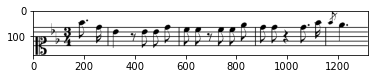

In [12]:
#rotating the image if required
if angle==0:
    print("No need to rotate image")
elif acute_angle == True:
    print("Acute")
    for i in range(height):
        for j in range(width):
            rad = math.sqrt(j**2 + (height-i)**2)
            initial_angle = math.acos(j/rad)
            y = int(rad*math.cos(initial_angle-angle))
            x = int(height - rad*math.sin(initial_angle-angle))
            perfect_image[x,y]=binary_image[i,j]
else:
    print("Obsolute")
    for i in range(height):
        for j in range(width):
            rad = math.sqrt(j**2 + i**2)
            if rad == 0:
                initial_angle = math.acos(0)
            else:
                initial_angle = math.acos(j/rad)
            y = int(rad*math.cos(initial_angle-angle))
            x = int(rad*math.sin(initial_angle-angle)) + (new_height-height)
            perfect_image[x,y]=binary_image[i,j]

plt.imshow(perfect_image, cmap = plt.get_cmap('gray'), vmin = 0, vmax= 255)
plt.show()
if angle!=0:
    height = new_height
    width = new_width

In [13]:
found_all = False
i = 0
j = height - 1
prev_j = -1
staff_start_all = []
space_start_all = []
while found_all==False:
    stable_staff = [0]
    stable_space = [0]
    for i in range(width):
        staff_temp, space_temp = findStaffPair(perfect_image, i, j)
        if len(staff_temp) > 0 and len(space_temp) > 0:
            if stable_staff[0]<staff_temp[0]:
                stable_staff = staff_temp
                stable_space = space_temp
    prev_j = j
    j = stable_space[-1]
    if prev_j == j:
        found_all = True
    else:
        staff_start_all.append(stable_staff)
        space_start_all.append(stable_space)
space_start_all.pop(-1)
staff_start_all.pop(-1)

[0]

In [14]:
print(staff_start_all)
print(space_start_all)

[[137, 119, 101, 83, 65]]
[[134, 116, 98, 80, 62]]


In [15]:
find_in =[]
staffless_image = np.copy(perfect_image)
for i in range(len(staff_start_all)):
    print(i)
    thickness = staff_start_all[i][0]-space_start_all[i][0]
    temp_dict={}
    temp_dict['lower'] = staff_start_all[i][0]+thickness
    temp_dict['upper'] = space_start_all[i][0]-thickness
    find_in.append(temp_dict)
    
    thickness = staff_start_all[i][1]-space_start_all[i][1]
    temp_dict={}
    temp_dict['lower'] = staff_start_all[i][1]+thickness
    temp_dict['upper'] = space_start_all[i][1]-thickness
    find_in.append(temp_dict)
    
    thickness = staff_start_all[i][2]-space_start_all[i][2]
    temp_dict={}
    temp_dict['lower'] = staff_start_all[i][2]+thickness
    temp_dict['upper'] = space_start_all[i][2]-thickness
    find_in.append(temp_dict)
    
    thickness = staff_start_all[i][3]-space_start_all[i][3]
    temp_dict={}
    temp_dict['lower'] = staff_start_all[i][3]+thickness
    temp_dict['upper'] = space_start_all[i][3]-thickness
    find_in.append(temp_dict)
    
    thickness = staff_start_all[i][4]-space_start_all[i][4]
    temp_dict={}
    temp_dict['lower'] = staff_start_all[i][4]+thickness
    temp_dict['upper'] = space_start_all[i][4]-thickness
    find_in.append(temp_dict)

0


In [16]:
for i in range(len(find_in)):
    height1 = find_in[i]['lower']
    isLine_dict ={}
    while height1>find_in[i]['upper']:
        black_count=0
        for width1 in range(width):
            if perfect_image[height1, width1] == 0:
                black_count = black_count+1
        perc_precision = 50
        if black_count > (width/100)*perc_precision:
            isLine_dict[height1] = True
        else:
            isLine_dict[height1] = False
        height1 = height1 - 1
    find_in[i]['isLine'] = isLine_dict

In [17]:
for i in range(len(find_in)):
    for h in find_in[i]['isLine'].keys():
        if find_in[i]['isLine'][h] == True:
            for w in range(width):
                thick = int((find_in[i]['lower']-find_in[i]['upper'])/3)
#                if not(perfect_image[find_in[i]['lower']-thick+1, w]==0 and perfect_image[find_in[i]['upper']+thick,w]==0):
                if perfect_image[find_in[i]['lower']-thick+1, w]==255 and perfect_image[find_in[i]['upper']+thick,w]==255:
                    staffless_image[h,w]=255

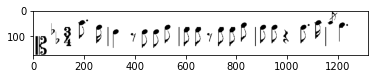

True

In [18]:
plt.imshow(staffless_image, cmap = plt.get_cmap('gray'), vmin = 0, vmax= 255)
plt.show()
cv2.imwrite("removed_lines.jpg",staffless_image)

In [19]:
perfect_image[find_in[i]['lower']-3+1, w]

255